In [2]:
# Documentation
# STAT3612 Statistical Machine Learning, SEM2, 2022
# Group Project
# Name: Lau Yan Chun Chris
# UID:3035790941

# This python notebook is mainly for the part of the feature selection of the group project

In [3]:
! pip install numpy pandas matplotlib seaborn sklearn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
## Part (A) Feature Selection

In [5]:
#read X_train first 3 rows for header
df_X_header = pd.read_csv("X_train.csv", dtype = str, nrows = 3,header = None)

#combine df_X_header by row
X_header = []
for ic in range(len(df_X_header.columns)):
    temp = ""
    for ir in range(len(df_X_header)):
        if(ir != 0):
            temp += "&"
        temp += df_X_header.iloc[ir,ic]
    X_header.append(temp)
    


#read X_train csv files except first 3 rows 
X_train = pd.read_csv("X_train.csv",
                         skiprows = 3,
                         header = None)

X_valid = pd.read_csv("X_valid.csv",
                          skiprows = 3,
                          header = None)

#combine header and the data together
X_train.columns = X_header

#read Y_train csv file
Y_train = pd.read_csv("Y_train.csv")
Y_valid = pd.read_csv("Y_valid.csv")

In [6]:
X_id = X_train.iloc[:,0]
X_feat = X_train.iloc[:,1:]
print(X_train.shape)
print(X_id.shape)
print(X_feat.shape)
print(Y_train.shape)

(16760, 7489)
(16760,)
(16760, 7488)
(16760, 2)


In [ ]:
#Three principle to conduct the features Selection
    #1. Only select the features mean of the variable by time
    #2. Only select the either one feature among the features group with low covariance (< 0.9)
    #3  Only select the features with non-zero weights under Simple Logistic Regression Model with L1 Regularization
    

In [8]:
def featureSelectByMean(df_feat,df_header,cols = None):
    if (cols == None):
        cols = np.full((df_feat.shape[1],), False, dtype = bool)
    for ic in range(len(df_header.columns)):
        if (df_header.iloc[1,ic] == "mean"):
            cols[ic] = True
    
    print("Select features with mean value:")
    print("Original:",df_feat.shape[1],"\tSelected:",np.sum(cols))        
    return df_feat.iloc[:,cols]
    

X_feat = featureSelectByMean(X_feat,df_X_header)
X_feat.describe()

Select features with mean value:
Original: 7488 	Selected: 2496


,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&mean&3,alanine aminotransferase&mean&4,alanine aminotransferase&mean&5,alanine aminotransferase&mean&6,alanine aminotransferase&mean&7,alanine aminotransferase&mean&8,alanine aminotransferase&mean&9,alanine aminotransferase&mean&10,...,white blood cell count urine&mean&15,white blood cell count urine&mean&16,white blood cell count urine&mean&17,white blood cell count urine&mean&18,white blood cell count urine&mean&19,white blood cell count urine&mean&20,white blood cell count urine&mean&21,white blood cell count urine&mean&22,white blood cell count urine&mean&23,white blood cell count urine&time_since_measured&0
count,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,...,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000
mean,-0.065219,-0.064588,-0.064803,-0.064101,-0.064031,-0.063712,-0.063905,-0.064175,-0.064640,-0.064856,...,-0.000300,-0.000252,-0.000329,-0.000262,-0.000249,-0.000257,-0.000282,-0.000300,-0.000448,269.869093
std,0.423142,0.428927,0.427698,0.435464,0.436145,0.438468,0.435569,0.432840,0.426678,0.420549,...,0.339446,0.338852,0.338696,0.338709,0.338702,0.338702,0.338711,0.338711,0.338265,315.670695
min,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,...,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,0.000000
25%,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,360.000000
max,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,...,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,2232.000000


In [9]:
def featureSelectByCorr(df_feat,threshold = 0.9):
    corr = df_feat.corr()
    
    cols = np.full((corr.shape[0],), True, dtype = bool)
    for i in range(corr.shape[0],0,-1):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= threshold:
                if(cols[j]):
                    cols[j] = False
    print("Select features by filtering features with high covariance","(>= "+str(threshold)+")",":")
    print("Original:",df_feat.shape[1],"\tSelected:",np.sum(cols))
    
    return df_feat.iloc[:,cols]

X_feat = featureSelectByCorr(X_feat,0.9)
X_feat.describe()

Select features by filtering features with high covariance (>= 0.9) :
Original: 2496 	Selected: 397


,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&time_since_measured&0,albumin&mean&1,albumin&time_since_measured&0,albumin ascites&mean&1,albumin ascites&time_since_measured&0,albumin pleural&mean&1,albumin pleural&time_since_measured&0,albumin urine&mean&1,...,total protein urine&time_since_measured&0,troponin-i&mean&1,troponin-t&mean&1,troponin-t&time_since_measured&0,venous pvo2&mean&1,weight&mean&1,weight&time_since_measured&0,white blood cell count&mean&1,white blood cell count urine&mean&1,white blood cell count urine&time_since_measured&0
count,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,1.676000e+04,16760.000000,16760.000000,16760.000000,1.676000e+04,...,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000
mean,-0.065219,-0.064588,33.225000,0.034359,46.030847,1.848164e-18,6915.172375,0.000044,8732.591826,7.286667e-20,...,1559.202029,-0.002609,-0.025065,69.243735,-0.000489,-0.014655,27.429415,0.001104,-0.000158,269.869093
std,0.423142,0.428927,38.602299,0.619799,50.040251,5.462116e-02,6261.763074,0.051822,8127.378115,5.516467e-02,...,1779.006089,0.168234,0.504190,85.521628,0.123559,0.812038,35.051215,0.962887,0.338099,315.670695
min,-0.279057,-0.279057,0.000000,-3.131888,0.000000,-1.702985e+00,0.000000,-2.312068,0.000000,-5.691630e-01,...,0.000000,-0.692272,-0.366371,0.000000,-2.765677,-3.517696,0.000000,-1.160785,-0.316046,0.000000
25%,-0.248043,-0.248043,0.000000,0.000000,11.000000,0.000000e+00,2157.000000,0.000000,2232.750000,0.000000e+00,...,398.000000,0.000000,0.000000,11.000000,0.000000,-0.405690,2.000000,-0.414731,0.000000,57.000000
50%,0.000000,0.000000,23.000000,0.000000,25.000000,0.000000e+00,5146.000000,0.000000,6192.000000,0.000000e+00,...,984.000000,0.000000,0.000000,41.000000,0.000000,0.000000,21.000000,-0.120972,0.000000,154.000000
75%,0.000000,0.000000,48.000000,0.000000,69.000000,0.000000e+00,9888.000000,0.000000,13056.000000,0.000000e+00,...,2034.250000,0.000000,0.000000,96.000000,0.000000,0.122018,33.000000,0.228741,0.000000,360.000000
max,10.413320,10.413320,336.000000,3.492301,480.000000,3.469357e+00,31735.000000,1.613770,36853.000000,4.592960e+00,...,11424.000000,3.830272,8.913147,768.000000,3.207278,7.198578,431.000000,54.802581,11.783246,2232.000000


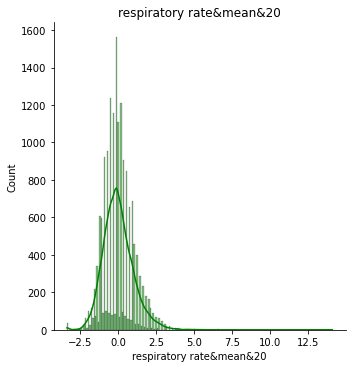

In [12]:
#visualizing the features to check its distribution to determine whether normalization or standardization is more suitable for feature scaling

check_ID = 326

sns.displot(X_feat_std.iloc[:,check_ID], color = 'g', kde  = True).set(title = X_feat.columns[check_ID])

plt.show()

In [10]:
#Standardlization of features
def XStandardization(df_X):
    res = df_X.copy()
    for i in df_X.columns:
        res[i] = (df_X[i] - np.mean(df_X[i])) / np.std(df_X[i])
    return res
X_feat_std = XStandardization(X_feat)
X_feat_std.describe()

,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&time_since_measured&0,albumin&mean&1,albumin&time_since_measured&0,albumin ascites&mean&1,albumin ascites&time_since_measured&0,albumin pleural&mean&1,albumin pleural&time_since_measured&0,albumin urine&mean&1,...,total protein urine&time_since_measured&0,troponin-i&mean&1,troponin-t&mean&1,troponin-t&time_since_measured&0,venous pvo2&mean&1,weight&mean&1,weight&time_since_measured&0,white blood cell count&mean&1,white blood cell count urine&mean&1,white blood cell count urine&time_since_measured&0
count,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,...,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04
mean,1.054483e-15,4.108223e-16,1.504727e-15,1.275090e-15,8.096296e-16,3.648299e-17,5.229177e-17,-3.485518e-16,-1.615255e-16,-2.530382e-19,...,-4.767467e-17,1.923181e-16,-1.040717e-14,-2.994771e-15,4.781891e-16,7.985657e-16,5.016837e-15,-2.853061e-17,3.465015e-15,2.369258e-14
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,...,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-5.053731e-01,-5.000271e-01,-8.607257e-01,-5.108659e+00,-9.199039e-01,-3.117905e+01,-1.104382e+00,-4.461811e+01,-1.074498e+00,-1.031784e+01,...,-8.764717e-01,-4.099543e+00,-6.769595e-01,-8.096876e-01,-2.238018e+01,-4.314014e+00,-7.825758e-01,-1.206708e+00,-9.343373e-01,-8.549325e-01
25%,-4.320761e-01,-4.277187e-01,-8.607257e-01,-5.543674e-02,-7.000743e-01,-3.383704e-17,-7.599001e-01,-8.540350e-04,-7.997703e-01,-1.320933e-18,...,-6.527446e-01,1.551132e-02,4.971496e-02,-6.810613e-01,3.954402e-03,-4.815618e-01,-7.255148e-01,-4.318755e-01,4.659175e-04,-6.743592e-01
50%,1.541344e-01,1.505857e-01,-2.648885e-01,-5.543674e-02,-4.202912e-01,-3.383704e-17,-2.825443e-01,-8.540350e-04,-3.126061e-01,-1.320933e-18,...,-3.233374e-01,1.551132e-02,4.971496e-02,-3.302624e-01,3.954402e-03,1.804747e-02,-1.834346e-01,-1.267854e-01,4.659175e-04,-3.670678e-01
75%,1.541344e-01,1.505857e-01,3.827606e-01,-5.543674e-02,4.590272e-01,-3.383704e-17,4.747730e-01,-8.540350e-04,5.319719e-01,-1.320933e-18,...,2.670380e-01,1.551132e-02,4.971496e-02,3.128690e-01,3.954402e-03,1.683128e-01,1.589318e-01,2.364172e-01,4.659175e-04,2.855305e-01
max,2.476437e+01,2.442891e+01,7.843679e+00,5.579303e+00,8.672660e+00,6.351861e+01,3.963831e+00,3.114096e+01,3.460064e+00,8.326157e+01,...,5.545283e+00,2.278370e+01,1.772839e+01,8.170765e+00,2.596220e+01,8.883136e+00,1.151408e+01,5.691539e+01,3.485300e+01,6.215938e+00


Features selected after applying SLR model with L1 regularization:
L1 C value: 0.001 	Number of features: 397 	Selected: 0
L1 C value: 0.002 	Number of features: 397 	Selected: 5
L1 C value: 0.003 	Number of features: 397 	Selected: 12
L1 C value: 0.004 	Number of features: 397 	Selected: 23
L1 C value: 0.005 	Number of features: 397 	Selected: 29
L1 C value: 0.006 	Number of features: 397 	Selected: 38
L1 C value: 0.007 	Number of features: 397 	Selected: 42
L1 C value: 0.008 	Number of features: 397 	Selected: 44
L1 C value: 0.009 	Number of features: 397 	Selected: 50
L1 C value: 0.01 	Number of features: 397 	Selected: 55
L1 C value: 0.011 	Number of features: 397 	Selected: 62
L1 C value: 0.012 	Number of features: 397 	Selected: 66
L1 C value: 0.013 	Number of features: 397 	Selected: 70
L1 C value: 0.014 	Number of features: 397 	Selected: 75


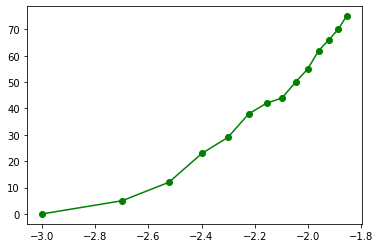

In [13]:
#Feature selection by simple logistic regression with L1 regulation
from sklearn.linear_model import LogisticRegression

def CheckSelectBySLR_L1(df_feat_std,Y_train,C):
    C = [1e-3,2e-3,3e-3,4e-3,5e-3,6e-3,7e-3,8e-3,9e-3,1e-2,1.1e-2,1.2e-2,1.3e-2,1.4e-2]
    print("Features selected after applying SLR model with L1 regularization:")
    n_feat = []
    for n_c in C:
        clf = LogisticRegression(penalty = 'l1',C = n_c, solver = 'liblinear')
        clf.fit(X_feat_std,Y_train.iloc[:,1])
    
        cols_l1 = []
        for i in range(clf.coef_.shape[1]):
            if clf.coef_[0,i] != 0.0:
                cols_l1.append(True)
            else:
                cols_l1.append(False)
        n_feat.append(np.sum(cols_l1))
        print("L1 C value:",n_c, "\tNumber of features:",clf.coef_.shape[1], "\tSelected:",np.sum(cols_l1))

    nc_log = list(map(np.log10,C))
    plt.plot(nc_log, n_feat, marker = "o",color = "g")

CheckSelectBySLR_L1(X_feat_std,Y_train,C)

In [40]:
def featureSelectBySLR_L1(df_X,df_Y,C = 0.01):
    clf = LogisticRegression(penalty = 'l1',C = C, solver = 'liblinear')
    clf.fit(df_X,df_Y)
    cols_l1 = []
    for i in range(clf.coef_.shape[1]):
        if clf.coef_[0,i] != 0.0:
            cols_l1.append(True)
        else:
            cols_l1.append(False)
    return df_X.iloc[:,cols_l1]

X_feat_l1 = featureSelectBySLR_L1(X_feat_std,Y_train.iloc[:,1], C = 0.004)
X_feat_l1.describe()

,albumin&mean&1,anion gap&mean&1,bilirubin&mean&1,blood urea nitrogen&mean&1,fraction inspired oxygen&mean&2,fraction inspired oxygen set&mean&4,fraction inspired oxygen set&mean&7,fraction inspired oxygen set&mean&8,glascow coma scale total&mean&1,glucose&mean&13,...,mean corpuscular hemoglobin concentration&mean&1,mean corpuscular volume&mean&1,oxygen saturation&mean&23,plateau pressure&mean&1,respiratory rate&mean&2,respiratory rate&mean&3,respiratory rate&mean&13,systolic blood pressure&mean&22,tidal volume set&mean&1,white blood cell count&mean&1
count,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,...,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04,1.676000e+04
mean,1.275090e-15,-1.923932e-15,1.652583e-15,6.482616e-16,1.543798e-14,-5.830943e-15,-2.551836e-15,6.378251e-15,1.915572e-15,-4.258262e-16,...,-4.908431e-16,-1.113204e-17,-5.699193e-15,9.022965e-15,-9.925699e-16,7.419085e-16,-1.556657e-15,-1.885259e-17,-7.400047e-15,-2.853061e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,...,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-5.108659e+00,-2.372017e+00,-7.308122e-01,-1.172020e+00,-3.355496e+00,-3.151242e+00,-3.373233e+00,-3.436148e+00,-2.790479e+00,-2.084532e+00,...,-5.635957e+00,-4.861586e+00,-2.545177e+01,-6.231648e+00,-3.129619e+00,-3.121272e+00,-3.253009e+00,-5.674861e+00,-7.415750e+00,-1.206708e+00
25%,-5.543674e-02,-6.655582e-01,-4.721936e-01,-5.959694e-01,-1.547933e-01,-8.092424e-02,3.725870e-02,6.813383e-02,7.690161e-02,-6.209018e-01,...,-6.357845e-01,-5.442385e-01,-4.386047e-01,5.775927e-02,-6.909619e-01,-6.914210e-01,-6.186907e-01,-7.303421e-01,-6.039166e-02,-4.318755e-01
50%,-5.543674e-02,-1.779984e-01,9.727443e-02,-3.079440e-01,-1.547933e-01,-8.092424e-02,3.725870e-02,6.813383e-02,7.690161e-02,-2.143378e-01,...,7.852587e-02,-9.761640e-02,8.798822e-02,5.775927e-02,-1.103293e-01,-1.642784e-01,-9.182695e-02,-1.181636e-01,-6.039166e-02,-1.267854e-01
75%,-5.543674e-02,5.533413e-01,9.727443e-02,1.961006e-01,-1.547933e-01,-8.092424e-02,3.725870e-02,6.813383e-02,8.831418e-01,3.548518e-01,...,6.629616e-01,4.978798e-01,6.145811e-01,5.775927e-02,5.283665e-01,5.235043e-01,6.106580e-01,6.352869e-01,-6.039166e-02,2.364172e-01
max,5.579303e+00,8.598078e+00,2.126614e+01,1.078104e+01,3.782335e+00,4.044558e+00,4.619821e+00,4.776719e+00,1.066823e+00,1.950402e+01,...,3.715015e+00,7.048338e+00,8.778776e-01,1.732896e+01,1.394098e+01,1.388768e+01,1.395787e+01,5.203080e+00,7.363442e+00,5.691539e+01


In [42]:
def totalFeatureSelected(X_header, df_selected,X_test):
    cols = np.full(len(X_header), False, dtype = bool)
    for i in range(len(X_header)):
        if X_header[i] in df_selected.columns:
            cols[i] = True
    return X_test.iloc[:,cols]

X_valid_selected = totalFeatureSelected(X_header, X_feat_l1,X_valid)
X_valid_selected.columns = X_feat_l1.columns
print(X_valid.shape)
print(X_valid_selected.shape)

(2394, 7489)
(2394, 23)


In [38]:
print()

Maximized accuracy : 0.9344 at C: 1e-06


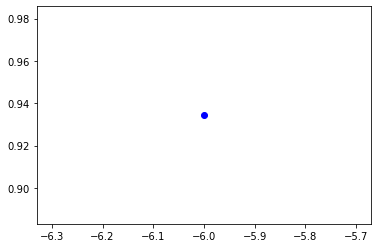

In [72]:
#1 Task 1
#Use simple Logistic Regression with L2 regulation as model

def runTaskOne(X_train,Y_train,X_test,Y_test,c_l2 = None,plot_color = ['b']):
    if(c_l2 == None):
        c_l2 = [1e-6]
    accuracy = []
    for c_i, color in zip(c_l2,plot_color):
        clf = LogisticRegression(penalty = 'l2', C = c_i, solver = 'liblinear')
        clf.fit(X_train,Y_train.iloc[:,1])
        accuracy.append(clf.score(X_test,Y_test.iloc[:,1]))

    nc_log = list(map(np.log10,c_l2))
    plt.plot(nc_log, accuracy, marker = "o",color = color)
    print("Maximized accuracy :",np.round(np.max(accuracy),4),"at C:",c_l2[accuracy.index(np.max(accuracy))])
    
    # return round(np.max(accuracy), C[accuracy.index(np.max(accuracy))]

runTaskOne(X_feat_l1, Y_train, X_valid_selected, Y_valid)

using L1 regularization with C value: 0.002
Maximized accuracy : 0.9373 at C: 0.0001
using L1 regularization with C value: 0.003
Maximized accuracy : 0.9373 at C: 0.01
using L1 regularization with C value: 0.004
Maximized accuracy : 0.9382 at C: 0.01
using L1 regularization with C value: 0.005
Maximized accuracy : 0.9394 at C: 0.0001
using L1 regularization with C value: 0.006
Maximized accuracy : 0.9394 at C: 0.0001


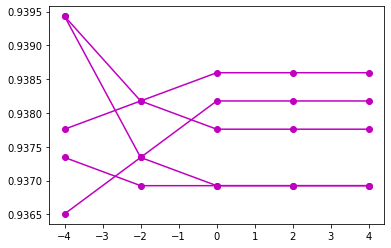

In [75]:
def runTaskOne_l1_l2():
    C_l1 = [2e-3,3e-3,4e-3,5e-3,6e-3]
    C_l2 = [1e-4,1e-2,1,1e2,1e4]
    plot_color = ['r','g','b','c','m']
    
    for ci_l1 in C_l1:
        print("using L1 regularization with C value:",ci_l1)
        temp_acc = []
        temp_c2 = []
        X_feat_l1 = featureSelectBySLR_L1(X_feat_std,Y_train.iloc[:,1], C = ci_l1)
        X_valid_selected = totalFeatureSelected(X_header, X_feat_l1,X_valid)
        X_valid_selected.columns = X_feat_l1.columns
        runTaskOne(X_feat_l1, Y_train, X_valid_selected, Y_valid,C_l2,plot_color)
            
runTaskOne_l1_l2()